<a href="https://colab.research.google.com/github/KunalDholariya/Retail_Sales_Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

The demand for a product or service keeps changing from time to time. No business can improve its financial performance without estimating customer demand and future sales of products/services accurately. Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time.Retail sales prediction refers to the practice of using historical sales data, along with other relevant factors, to forecast future sales in the retail industry. This predictive analysis is crucial for businesses to make informed decisions, optimize inventory management, plan marketing campaigns, and allocate resources effectively.

In this project I got 2 different csv files as an input. The Csv files are Store.csv and Rossmann Stores Data.csv .

While exploring dataset of 2 csv files I am using here python libraries such as numpy,pandas,seaborn and matplotlib and after that I made a colab and work with adding a good amount of data analysis.

After completing this project we discussed about all the important topics in project like data cleaning, know variable attributes with data wrangling stuff and use of data visualization to represent our analysis.

# **GitHub Link -**

https://github.com/KunalDholariya/Retail_Sales_Prediction

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from datetime import datetime
import scipy.stats as stats
from scipy.stats import mstats
import statsmodels.api as sm
from scipy.stats import f_oneway
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, max_error
from sklearn.model_selection import LeavePOut
from sklearn.preprocessing import StandardScaler
# Define the ElasticNet model and set up the parameter grid for Grid Search
from sklearn.linear_model import ElasticNet

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:

path = "/content/drive/MyDrive/Capstone Project/ML Regression/"
rossmann_sales_df = pd.read_csv(path + "Rossmann Stores Data.csv", low_memory=False)
stores_df = pd.read_csv(path + "store.csv")

### Dataset First View

In [4]:
# Dataset First Look of Rossmann sales df
rossmann_sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# Dataset last look of rossmann_sales_df
rossmann_sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
# Dataset first five look of stores df
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
# Dataset last look of stores df
stores_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [8]:
# Rossmann stores df and stores df dataset Rows & Columns count
Rossmann_sales_rows = len(rossmann_sales_df.axes[0])
Rossmann_salaes_cols = len(rossmann_sales_df.axes[1])
print("Number of rows in rossmann dataset:  ", Rossmann_sales_rows)
print("Number of columns in rossmann dataset: ", Rossmann_salaes_cols)

Stores_rows   = len(stores_df.axes[0])
Stores_cols = len(stores_df.axes[1])
print("Number of rows in stores dataset: ", Stores_rows)
print("Number of columns in stores dataset: ", Stores_cols)

Number of rows in rossmann dataset:   1017209
Number of columns in rossmann dataset:  9
Number of rows in stores dataset:  1115
Number of columns in stores dataset:  10


### Dataset Information

In [9]:
# Rossmann Sales df Dataset Info
rossmann_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
# Stores df dataset info
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [11]:
# rossmann sales df Dataset Duplicate Value Count
rossmann_duplicate_value = rossmann_sales_df[rossmann_sales_df.duplicated()]
print("Duplicate rows in rossmann_sales_df dataset:", len(rossmann_duplicate_value))

# Stores df dataset duplicatae value count
stores_duplicate_value = stores_df[stores_df.duplicated()]
print("Duplicate rows in stores_df dataset:", len(stores_duplicate_value))

Duplicate rows in rossmann_sales_df dataset: 0
Duplicate rows in stores_df dataset: 0


#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count of rossmann sales df dataset
print(f"Missing Values in each column"+"\n"+"--"*15)
Missing_values = rossmann_sales_df.isnull().sum()
Missing_values

Missing Values in each column
------------------------------


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [13]:
# Missing Values/Null Values Count of stores df dataset
print(f"Missing Values in each column"+"\n"+"--"*15)
Missing_values = stores_df.isnull().sum()
Missing_values

Missing Values in each column
------------------------------


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

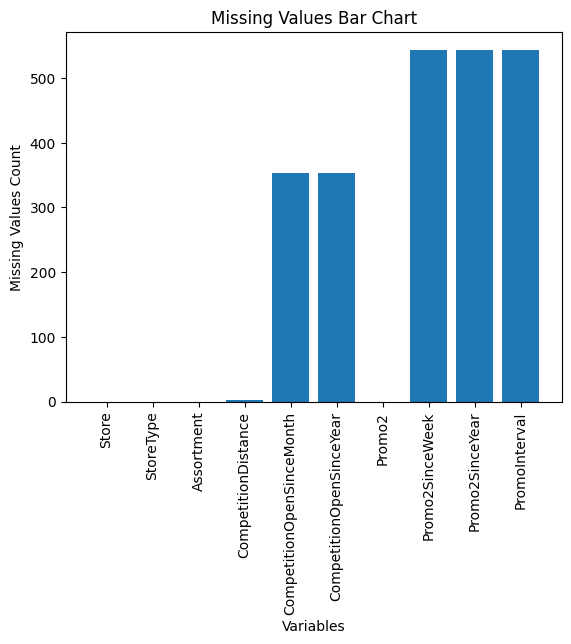

In [14]:
# Visualizing the missing values
# Create a bar chart for missing values
plt.bar(Missing_values.index, Missing_values.values)
plt.xlabel('Variables')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Bar Chart')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

In [15]:
# Store data set fill into null values that is 0
stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median(),inplace=True)
stores_df['CompetitionOpenSinceMonth'].fillna(stores_df['CompetitionOpenSinceMonth'].mode()[0],inplace=True)
stores_df['CompetitionOpenSinceYear'].fillna(stores_df['CompetitionOpenSinceYear'].mode()[0],inplace=True)
stores_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores_df['Promo2SinceYear'].fillna(value=0,inplace=True)
stores_df['PromoInterval'].fillna(value=0,inplace=True)
stores_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### What did you know about your dataset?

With the help of rossmann sales and stores dataset i find missing values.There is no duplicate values in both dataset and there is no missing values in rossmann sales dataset but in stores df there are missing values in competitiondistance, competitionopensincemonth, competitionopensinceyear, promo2sinceweek, etc columns.Answer Here

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns of rossmann sales df
print("Columns of rossmann_sales_df:-- \n", rossmann_sales_df.columns)

# Dataset Columns of stores_df
print("\nColumns of stores_df:-- \n", stores_df.columns)

Columns of rossmann_sales_df:-- 
 Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

Columns of stores_df:-- 
 Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [17]:
# Rossmann sales df Dataset Describe
rossmann_sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [18]:
# Stores df Dataset Describe
stores_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5396.614350,7.788341,2010.043946,0.512108,12.083408,1030.239462
std,322.01708,7654.513635,2.779130,5.500844,0.500078,15.542241,1006.038782
min,1.00000,20.000000,1.000000,1900.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,6.000000,2008.000000,0.000000,0.000000,0.000000
50%,558.00000,2325.000000,9.000000,2012.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2013.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [19]:
# Change data types object to int
rossmann_sales_df.loc[rossmann_sales_df['StateHoliday']== '0', 'StateHoliday'] = 0
rossmann_sales_df.loc[rossmann_sales_df['StateHoliday']== 'a', 'StateHoliday'] = 1
rossmann_sales_df.loc[rossmann_sales_df['StateHoliday']== 'b', 'StateHoliday'] = 2
rossmann_sales_df.loc[rossmann_sales_df['StateHoliday']== 'c', 'StateHoliday'] = 3

# Store the value wiith same column name that is StateHoliday with function astype
rossmann_sales_df['StateHoliday'] = rossmann_sales_df['StateHoliday'].astype(int,copy=False)

In [20]:
# Convert "Date" column to datetime datatype
rossmann_sales_df['Date'] = pd.to_datetime(rossmann_sales_df['Date'])

# Extract year, month, and day of the week
rossmann_sales_df['Year'] = rossmann_sales_df['Date'].dt.year
rossmann_sales_df['Month'] = rossmann_sales_df['Date'].dt.month
rossmann_sales_df['DayOfMonth'] = rossmann_sales_df['Date'].dt.day

print("Updated Rossman Sales DataFrame:")
rossmann_sales_df.head()

Updated Rossman Sales DataFrame:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31


In [21]:
# Replace missing values with a specific value
stores_df['Assortment'] = stores_df['Assortment'].fillna(-1)

# Replace invalid literals with NaN
stores_df['Assortment'].replace({'a': 0, 'b': 1, 'c': 2}, inplace=True)

# Convert the 'Assortment' column to integer
stores_df['Assortment'] = stores_df['Assortment'].astype('Int64')

In [22]:
# Perform data type conversion
stores_df['CompetitionOpenSinceMonth'] = stores_df['CompetitionOpenSinceMonth'].astype('Int64')
stores_df['CompetitionOpenSinceYear'] = stores_df['CompetitionOpenSinceMonth'].astype('Int64')
stores_df['Promo2SinceWeek'] = stores_df['Promo2SinceWeek'].astype('Int64')
stores_df['Promo2SinceYear'] = stores_df['Promo2SinceYear'].astype('Int64')


In [23]:
# Drop rows with CompetitionOpenSinceYear values 1900 and 1961
stores_df = stores_df[~stores_df['CompetitionOpenSinceYear'].isin([1900, 1961])]

# Reset the index after dropping rows
stores_df.reset_index(drop=True, inplace=True)


In [24]:
# Convert 'CompetitionDistance' column to int data type
stores_df['CompetitionDistance'] = stores_df['CompetitionDistance'].astype(int)

In [25]:
# Dataset Describe
# Describe rossmann_sales_df
rossmann_sales_df_description = rossmann_sales_df.describe()
print("Description of Rossmann Sales DataFrame:")
rossmann_sales_df_description.T

Description of Rossmann Sales DataFrame:


,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
StateHoliday,1017209.0,0.045163,0.283656,0.0,0.0,0.0,0.0,3.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
Year,1017209.0,2013.832292,0.777396,2013.0,2013.0,2014.0,2014.0,2015.0
Month,1017209.0,5.846762,3.326097,1.0,3.0,6.0,8.0,12.0


In [26]:
# Describe stores_df
stores_df_description = stores_df.describe()
print("\nDescription of Stores DataFrame:")
stores_df_description.T


Description of Stores DataFrame:


,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.0,322.01708,1.0,279.5,558.0,836.5,1115.0
Assortment,1115.0,0.928251,0.993814,0.0,0.0,0.0,2.0,2.0
CompetitionDistance,1115.0,5396.61435,7654.513635,20.0,720.0,2325.0,6875.0,75860.0
CompetitionOpenSinceMonth,1115.0,7.788341,2.77913,1.0,6.0,9.0,9.0,12.0
CompetitionOpenSinceYear,1115.0,7.788341,2.77913,1.0,6.0,9.0,9.0,12.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,1115.0,12.083408,15.542241,0.0,0.0,1.0,22.0,50.0
Promo2SinceYear,1115.0,1030.239462,1006.038782,0.0,0.0,2009.0,2012.0,2015.0


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [27]:
# Check Unique Values for each variable.
# Create a dictionary to store unique values for each column
unique_values_dict = {column: rossmann_sales_df[column].unique() for column in rossmann_sales_df.columns if column != 'Date'}

# Print the unique values for each column
for column, unique_values in unique_values_dict.items():
    print(f"Unique Values for {column}:\n{unique_values}\n")

Unique Values for Store:
[   1    2    3 ... 1113 1114 1115]

Unique Values for DayOfWeek:
[5 4 3 2 1 7 6]

Unique Values for Sales:
[ 5263  6064  8314 ...   660 17815 23303]

Unique Values for Customers:
[ 555  625  821 ... 3900   36 4065]

Unique Values for Open:
[1 0]

Unique Values for Promo:
[1 0]

Unique Values for StateHoliday:
[0 1 2 3]

Unique Values for SchoolHoliday:
[1 0]

Unique Values for Year:
[2015 2014 2013]

Unique Values for Month:
[ 7  6  5  4  3  2  1 12 11 10  9  8]

Unique Values for DayOfMonth:
[31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8
  7  6  5  4  3  2  1]



In [28]:
# Create a dictionary to store unique values for each column
unique_values_dict = {column: stores_df[column].unique() for column in stores_df.columns}

# Print the unique values for each column
for column, unique_values in unique_values_dict.items():
    print(f"Unique Values for {column}:\n{unique_values}\n")

Unique Values for Store:
[   1    2    3 ... 1113 1114 1115]

Unique Values for StoreType:
['c' 'a' 'd' 'b']

Unique Values for Assortment:
<IntegerArray>
[0, 2, 1]
Length: 3, dtype: Int64

Unique Values for CompetitionDistance:
[ 1270   570 14130   620 29910   310 24000  7520  2030  3160   960  1070
  1300  4110  3270    50 13840  3240  2340   550  1040  4060  4590   430
  2300    60  1200  2170    40  9800  2910  1320  2240  7660   540  4230
  1090   260   180  1180   290  4880  9710   270  1060 18010  6260 10570
   450 30360  7170   720  6620   420  7340  2840  5540   350  2050  3700
 22560   410   250  1130  4840 17500  2200  1650   330 22440 19960  3510
  3320  7910  2370 22390  2710 11810  1870   480   560 10690  2380  2410
   240 16690 14620  1890  8780  8980 15140 17930  2440   150  5210   390
  6190  1390  1930  2190  3300 46590  7890  1630 20930  4510  5740   680
  3450  3580  2100  2290  3570 58260 16760  1410   760  3370  1350  2000
  2460   900   920  5190  1730 25360  170

## 3. ***Data Wrangling***

### Data Wrangling Code

In [29]:
# Write your code to make your dataset analysis ready.
merged_df = pd.merge(rossmann_sales_df, stores_df, on='Store', how='left')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,DayOfMonth,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,0,1270,9,9,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,31,a,0,570,11,11,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,31,a,0,14130,12,12,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,31,c,2,620,9,9,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,31,a,0,29910,4,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,2013,...,1,a,0,1900,6,6,1,31,2013,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2013,...,1,c,2,1880,4,4,0,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,2013,...,1,a,2,9260,9,9,0,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,2013,...,1,a,2,870,9,9,0,0,0,0


# **UNIVARIATE ANALYSIS**

In [30]:
# What is the average weekly sales for each store?
# Calculate the average weekly sales for each store
average_weekly_sales = merged_df.groupby("Store")["Sales"].mean()

# Print the average weekly sales for each store
print(average_weekly_sales)

Store
1        3945.704883
2        4122.991507
3        5741.253715
4        8021.769639
5        3867.110403
            ...     
1111     4342.968153
1112     8465.280255
1113     5516.180467
1114    17200.196391
1115     5225.296178
Name: Sales, Length: 1115, dtype: float64


In [31]:
# # Are there any noticeable differences in sales between SchoolHoliday and StateHoliday?
# Assuming 'merged_df' is your Pandas DataFrame containing the merged data
# Split data into subsets based on holiday type
school_holiday_data = merged_df[merged_df['SchoolHoliday'] == 1]
state_holiday_data = merged_df[merged_df['StateHoliday'] == 1]

# Calculate descriptive statistics
school_holiday_stats = school_holiday_data['Sales'].describe()
state_holiday_stats = state_holiday_data['Sales'].describe()

print("School Holiday Sales Statistics:")
print(school_holiday_stats)

print("\nState Holiday Sales Statistics:")
print(state_holiday_stats)

School Holiday Sales Statistics:
count    181721.000000
mean       6476.522207
std        3709.677337
min           0.000000
25%        4447.000000
50%        6197.000000
75%        8343.000000
max       38367.000000
Name: Sales, dtype: float64

State Holiday Sales Statistics:
count    20260.000000
mean       290.735686
std       1870.281698
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      38484.000000
Name: Sales, dtype: float64


In [32]:
# What is the distribution of the number of customers (Customers column)?
# Calculate descriptive statistics for the 'Customers' column
customers_stats = merged_df['Customers'].describe()

print("Customers Statistics:")
print(customers_stats)

Customers Statistics:
count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64


# **BIVARIAINTE ANALYSIS**

In [33]:
# Calculate the correlation coefficient between sales and day of the week
correlation = np.corrcoef(merged_df["Sales"], merged_df["DayOfWeek"])[0, 1]

# Print the correlation coefficient
print(correlation)

-0.4621250232272869


In [34]:
# What is the distribution of promotion status for different store types (e.g., Promo vs. StoreType)?
# Create a cross-tabulation of Promo vs. StoreType
cross_tab = pd.crosstab(merged_df['Promo'], merged_df['StoreType'])
print(cross_tab)

StoreType       a     b      c       d
Promo                                 
0          341123  9784  84596  193626
1          210504  6046  52244  119286


In [35]:
# Is there a difference in sales when the store is open (Open=1) or closed (Open=0) on StateHolidays or SchoolHolidays?
# Filter the data for StateHolidays and SchoolHolidays separately
state_holidays_data = merged_df[merged_df['StateHoliday'] == 1]
school_holidays_data = merged_df[merged_df['SchoolHoliday'] == 1]

# Group the data by 'Open' and calculate the mean sales for StateHolidays and SchoolHolidays
state_holidays_sales_by_open = state_holidays_data.groupby('Open')['Sales'].mean()
school_holidays_sales_by_open = school_holidays_data.groupby('Open')['Sales'].mean()
print(state_holidays_sales_by_open)
print(school_holidays_sales_by_open)

Open
0       0.000000
1    8487.471182
Name: Sales, dtype: float64
Open
0       0.00000
1    7200.18165
Name: Sales, dtype: float64


# **Multivariate Analysis**

In [36]:
# How does the sales performance (Sales) vary based on different store types (StoreType) and assortment types (Assortment)?
# Select the variables that you want to analyze
variables = ["Sales", "StoreType", "Assortment"]

# Calculate the mean sales for each store type and assortment type
grouped_df = merged_df.groupby(["StoreType", "Assortment"])["Sales"].mean()

# Print the mean sales for each store type and assortment type
print(grouped_df)

StoreType  Assortment
a          0              5398.858310
           2              6310.867032
b          0             10821.619806
           1              8553.931999
           2             17969.556263
c          0              5647.174314
           2              5805.782193
d          0              5317.885943
           2              5826.407660
Name: Sales, dtype: float64


In [37]:
# Is there a correlation between sales and other numerical variables?
# Select the numerical columns to calculate correlation with 'Sales'
numerical_columns = ['Customers', 'Promo', 'Open', 'CompetitionDistance', 'Store']

# Calculate the Pearson correlation coefficients
correlation_matrix = merged_df[numerical_columns + ['Sales']].corr()
print(correlation_matrix)

                     Customers     Promo      Open  CompetitionDistance  \
Customers             1.000000  0.316169  0.616768            -0.102362   
Promo                 0.316169  1.000000  0.295042             0.000140   
Open                  0.616768  0.295042  1.000000             0.007987   
CompetitionDistance  -0.102362  0.000140  0.007987             1.000000   
Store                 0.024325  0.000058 -0.000047            -0.026451   
Sales                 0.894711  0.452345  0.678472            -0.018869   

                        Store     Sales  
Customers            0.024325  0.894711  
Promo                0.000058  0.452345  
Open                -0.000047  0.678472  
CompetitionDistance -0.026451 -0.018869  
Store                1.000000  0.005126  
Sales                0.005126  1.000000  


In [38]:
# Are there any seasonal patterns in sales that differ based on store type (StoreType) and competition distance (CompetitionDistance)?
# Calculate the average sales across different months for each combination of StoreSize and CompetitionDistance
sales_by_size_distance_month = merged_df.groupby(['StoreType', 'CompetitionDistance', 'Month'])['Sales'].mean().reset_index()
print(sales_by_size_distance_month)

     StoreType  CompetitionDistance  Month        Sales
0            a                   20      1  4555.752688
1            a                   20      2  4797.773810
2            a                   20      3  4967.311828
3            a                   20      4  4767.588889
4            a                   20      5  4564.483871
...        ...                  ...    ...          ...
9979         d                48330      8  4268.741935
9980         d                48330      9  3853.100000
9981         d                48330     10  3690.935484
9982         d                48330     11  4092.900000
9983         d                48330     12  4529.274194

[9984 rows x 4 columns]


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

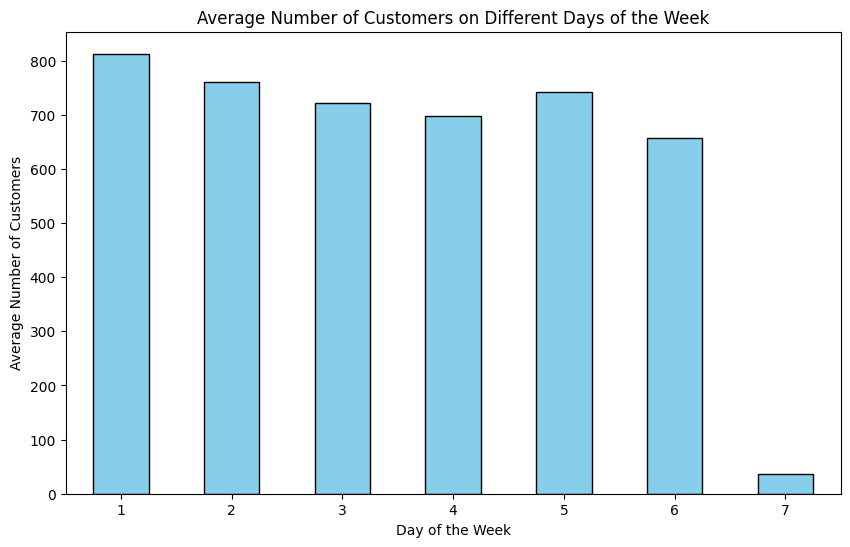

In [39]:
# Chart - 1 visualization code
# Is there a difference in the average number of customers on different days of the week (e.g., DayOfWeek vs. Customers)?
# Group the data by DayOfWeek and calculate the average number of customers for each day
average_customers_per_day = merged_df.groupby("DayOfWeek")["Customers"].mean()

# Plot the average number of customers for each day of the week
plt.figure(figsize=(10, 6))
average_customers_per_day.plot(kind="bar", color="skyblue", edgecolor="k")
plt.xticks(rotation=0)
plt.xlabel("Day of the Week")
plt.ylabel("Average Number of Customers")
plt.title("Average Number of Customers on Different Days of the Week")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

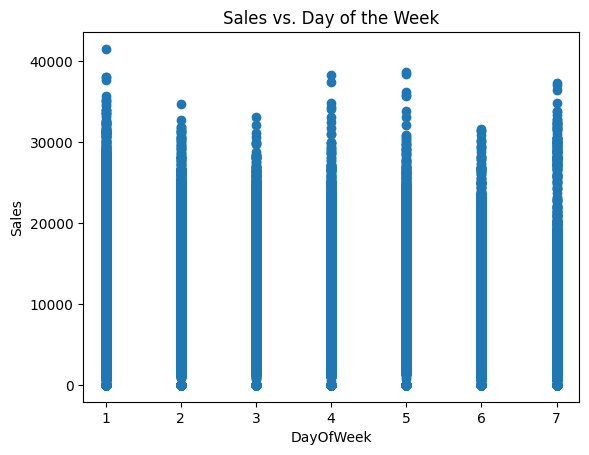

In [40]:
# Chart - 2 visualization code
# Plot a scatterplot of sales vs. day of the week
plt.scatter(merged_df["DayOfWeek"], merged_df["Sales"])

# Add a title to the plot
plt.title("Sales vs. Day of the Week")

# Add labels to the x-axis and y-axis
plt.xlabel("DayOfWeek")
plt.ylabel("Sales")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

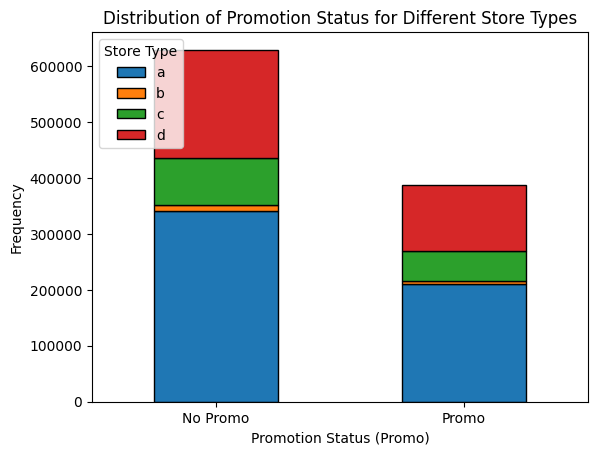

In [41]:
# Chart - 3 visualization code+
# Plot the distribution using a stacked bar chart
cross_tab.plot(kind="bar", stacked=True, edgecolor="k")
plt.xlabel("Promotion Status (Promo)")
plt.ylabel("Frequency")
plt.title("Distribution of Promotion Status for Different Store Types")
plt.legend(title="Store Type", loc="upper left")
plt.xticks(ticks=[0, 1], labels=["No Promo", "Promo"], rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

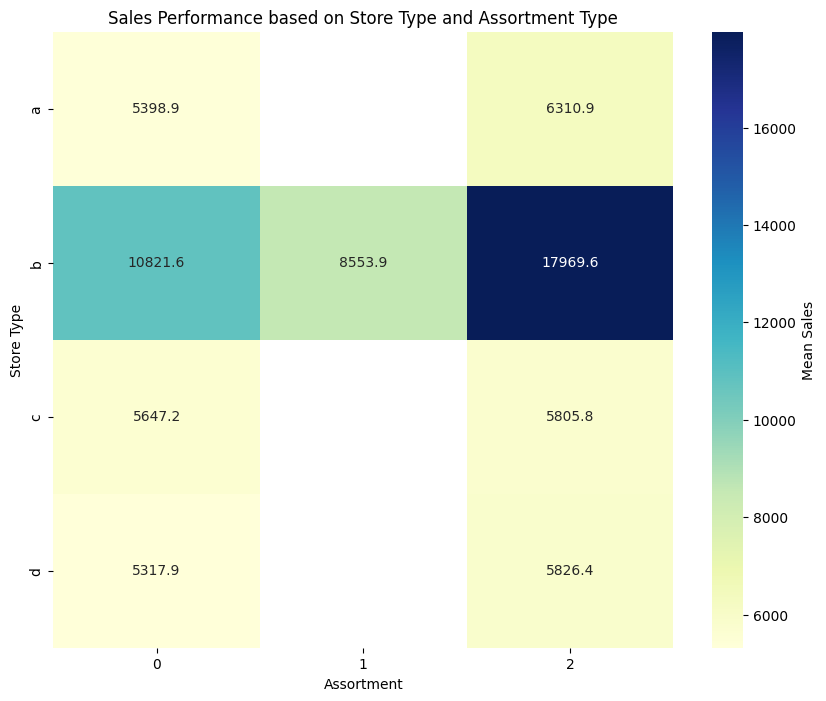

In [42]:
# Chart - 4 visualization code
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
heatmap_data = merged_df.pivot_table(values='Sales', index='StoreType', columns='Assortment', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Mean Sales'})
plt.xlabel("Assortment")
plt.ylabel("Store Type")
plt.title("Sales Performance based on Store Type and Assortment Type")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

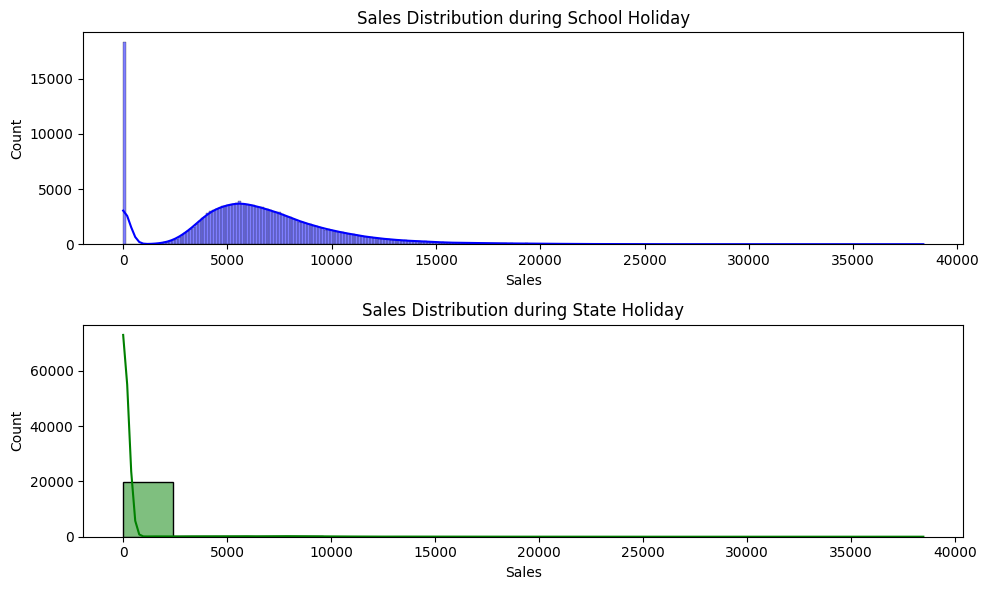

In [43]:
# Chart - 5 visualization code
# Are there any noticeable differences in sales between SchoolHoliday and StateHoliday?
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.histplot(school_holiday_data['Sales'], kde=True, color='blue')
plt.title('Sales Distribution during School Holiday')

plt.subplot(2, 1, 2)
sns.histplot(state_holiday_data['Sales'], kde=True, color='green')
plt.title('Sales Distribution during State Holiday')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

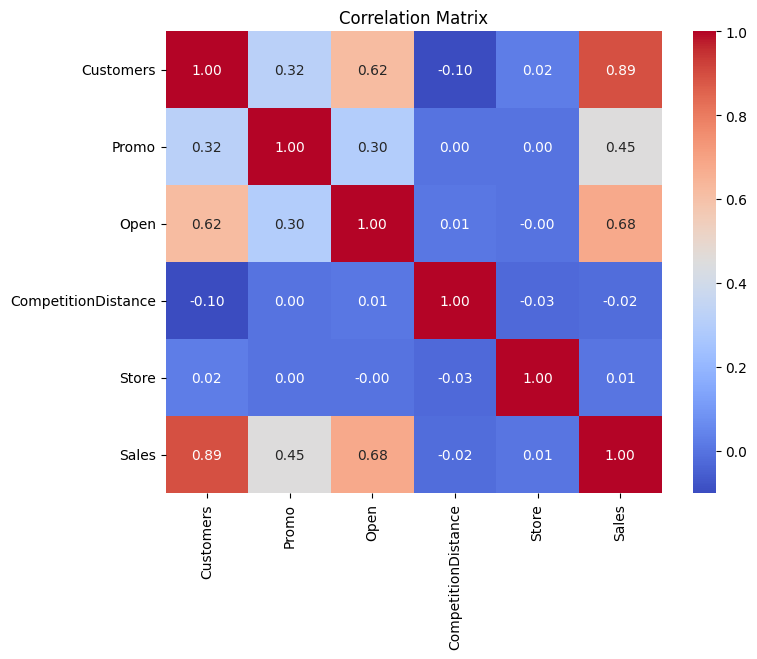

In [44]:
# Chart - 6 visualization code
#  Is there a correlation between sales and other numerical variables (if available)?
# # Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

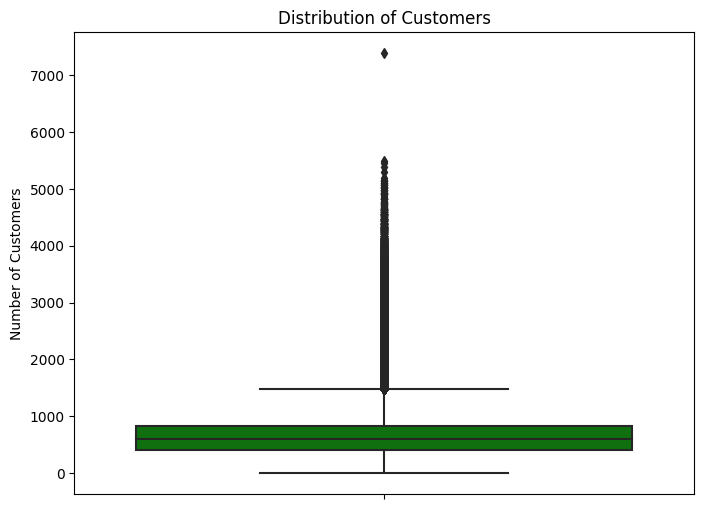

In [45]:
# Chart - 7 visualization code.
# What is the distribution of the number of customers (Customers column)?
# Create a box plot for the 'Customers' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, y='Customers', color='green')
plt.title('Distribution of Customers')
plt.ylabel('Number of Customers')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

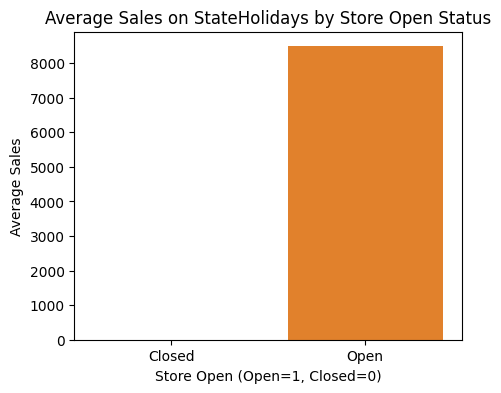

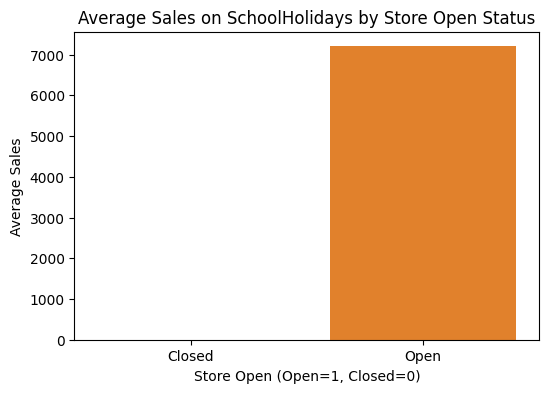

In [46]:
# Chart - 8 visualization code
# # Is there a difference in sales when the store is open (Open=1) or closed (Open=0) on StateHolidays or SchoolHolidays?
# Plot the grouped bar plots to compare sales when the store is open or closed on StateHolidays
plt.figure(figsize=(5, 4))
sns.barplot(x=state_holidays_sales_by_open.index, y=state_holidays_sales_by_open.values)
plt.title('Average Sales on StateHolidays by Store Open Status')
plt.xlabel('Store Open (Open=1, Closed=0)')
plt.ylabel('Average Sales')
plt.xticks(ticks=[0, 1], labels=['Closed', 'Open'])
plt.show()

# Plot the grouped bar plots to compare sales when the store is open or closed on SchoolHolidays
plt.figure(figsize=(6, 4))
sns.barplot(x=school_holidays_sales_by_open.index, y=school_holidays_sales_by_open.values)
plt.title('Average Sales on SchoolHolidays by Store Open Status')
plt.xlabel('Store Open (Open=1, Closed=0)')
plt.ylabel('Average Sales')
plt.xticks(ticks=[0, 1], labels=['Closed', 'Open'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

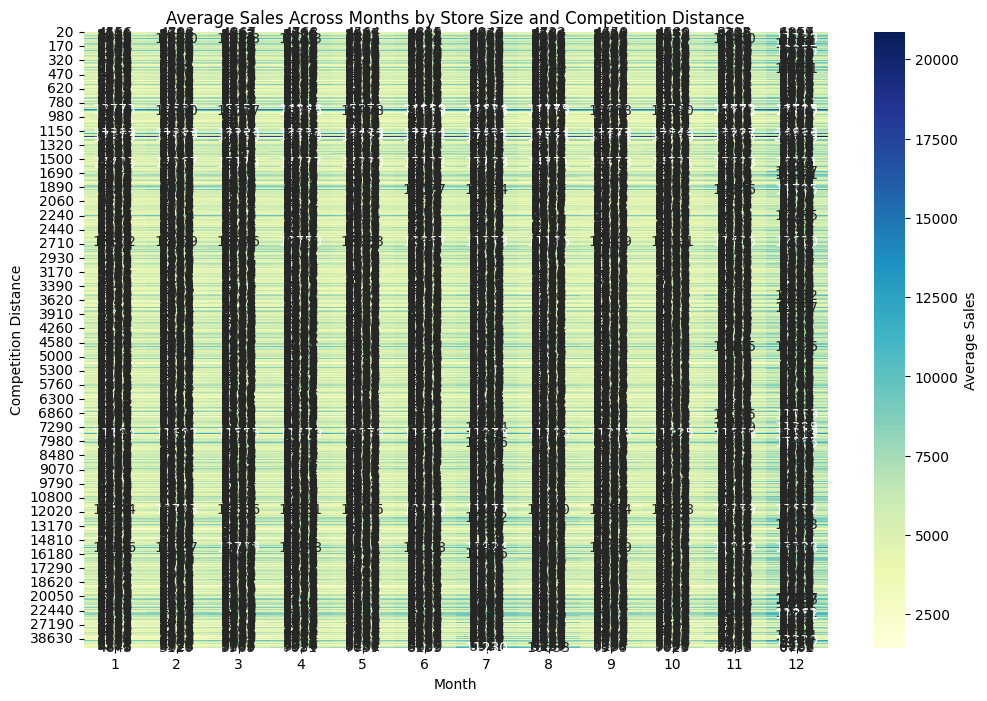

In [47]:
# Chart - 9 visualization code
# Are there any seasonal patterns in sales that differ based on store size (StoreSize) and competition distance (CompetitionDistance)?
# Pivot the data to create a matrix for the heatmap
heatmap_data = sales_by_size_distance_month.pivot_table(index='CompetitionDistance', columns='Month', values='Sales', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', cbar_kws={'label': 'Average Sales'})
plt.title('Average Sales Across Months by Store Size and Competition Distance')
plt.xlabel('Month')
plt.ylabel('Competition Distance')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1
**Univariate Analysis**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

a) What is the average weekly sales for each store?

Ans:- Null Hypothesis (H0): There is no significant difference in the average weekly sales among different stores.

Alternative Hypothesis (H1): There is a significant difference in the average weekly sales among different stores.

(b) Are there any noticeable differences in sales between SchoolHoliday and StateHoliday?

Ans:- Null Hypothesis (H0): There is no significant difference in sales between SchoolHoliday and StateHoliday.

Alternative Hypothesis (H1): There is a significant difference in sales between SchoolHoliday and StateHoliday.

(c) What is the distribution of the number of customers (Customers column)?

Ans:- Null Hypothesis (H0): The distribution of the number of customers follows a specific known distribution (e.g., normal distribution). Alternative Hypothesis (H1): The distribution of the number of customers does not follow a specific known distribution.

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value
# Grouping the data by 'Store' and calculating the mean sales for each store
store_sales_means = merged_df.groupby('Store')['Sales'].mean()

# Performing One-way ANOVA test
f_statistic, p_value = f_oneway(*[group['Sales'] for name, group in merged_df.groupby('Store')])

print("One-way ANOVA - P-value:", p_value)

One-way ANOVA - P-value: 0.0


In [49]:
# Separating data for SchoolHoliday and StateHoliday
school_holiday_sales = merged_df[merged_df['SchoolHoliday'] == 1]['Sales']
state_holiday_sales = merged_df[merged_df['StateHoliday'] == 1]['Sales']

# Performing independent t-test (assuming normally distributed data)
t_statistic, p_value_t = ttest_ind(school_holiday_sales, state_holiday_sales)

# Performing Mann-Whitney U test (for non-normally distributed data)
u_statistic, p_value_u = mannwhitneyu(school_holiday_sales, state_holiday_sales)

print("Independent t-test - P-value:", p_value_t)
print("Mann-Whitney U test - P-value:", p_value_u)

Independent t-test - P-value: 0.0
Mann-Whitney U test - P-value: 0.0


In [50]:
# Calculating the observed frequencies of each value in the 'Customers' column
observed_frequencies = merged_df['Customers'].value_counts()

# Performing the Chi-square test for goodness-of-fit
chi2_statistic, p_value, dof, expected = chi2_contingency(observed_frequencies)

print("Chi-square test - P-value:", p_value)

Chi-square test - P-value: 1.0


##### Which statistical test have you done to obtain P-Value?

In the provided code, one-way ANOVA was used to compare average weekly sales among different stores, independent t-test and Mann-Whitney U test were used to compare sales between SchoolHoliday and StateHoliday, and the Chi-square test was used to assess the distribution of the number of customers. P-values were obtained from these tests to evaluate statistical significance.



Why did you choose the specific statistical test?

The specific statistical tests were chosen to match the research questions and data characteristics. One-way ANOVA was selected to compare average sales among multiple stores. Independent t-test and Mann-Whitney U test were used to compare sales between different holiday types, depending on data normality. The Chi-square test for goodness-of-fit was applied to evaluate the distribution of customer counts and detect deviations from the expected distribution. These tests ensure appropriate analysis and valid conclusions.



### Hypothetical Statement - 2
**Bivariate Analysis**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

a) Calculate the correlation coefficient between sales and the day of the week.

Null Hypothesis (H0): There is no significant correlation between sales and the day of the week. Alternative Hypothesis (H1): There is a significant correlation between sales and the day of the week.

(b) What is the distribution of the promotion status for different store types (e.g., Promo vs. StoreType)?

Null Hypothesis (H0): The distribution of promotion status is the same for all store types. Alternative Hypothesis (H1): The distribution of promotion status is different for at least one store type.

(c) Is there a difference in sales when the store is open (Open=1) or closed (Open=0) on StateHolidays or SchoolHolidays?

Null Hypothesis (H0): There is no significant difference in sales between open and closed stores on StateHolidays or SchoolHolidays. Alternative Hypothesis (H1): There is a significant difference in sales between open and closed stores on StateHolidays or SchoolHolidays.

#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value

# Extracting the 'Sales' and 'DayOfWeek' columns
sales = merged_df['Sales']
day_of_week = merged_df['DayOfWeek']

# Performing Pearson correlation test
correlation_coefficient, p_value = pearsonr(sales, day_of_week)

print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation Coefficient: -0.46212502322725896
P-value: 0.0


In [52]:
# Creating a contingency table
contingency_table = pd.crosstab(merged_df['Promo'], merged_df['StoreType'])

# Performing the Chi-square test
chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test - P-value:", p_value)

Chi-square test - P-value: 0.9782753349984327


In [53]:
# Filtering data for open and closed stores on StateHolidays
open_on_state_holiday = merged_df[(merged_df['Open'] == 1) & (merged_df['StateHoliday'] == 1)]['Sales']
closed_on_state_holiday = merged_df[(merged_df['Open'] == 0) & (merged_df['StateHoliday'] == 1)]['Sales']

# Filtering data for open and closed stores on SchoolHolidays
open_on_school_holiday = merged_df[(merged_df['Open'] == 1) & (merged_df['SchoolHoliday'] == 1)]['Sales']
closed_on_school_holiday = merged_df[(merged_df['Open'] == 0) & (merged_df['SchoolHoliday'] == 1)]['Sales']

# Performing independent t-tests (assuming normally distributed data)
t_statistic_state_holiday, p_value_state_holiday = ttest_ind(open_on_state_holiday, closed_on_state_holiday)
t_statistic_school_holiday, p_value_school_holiday = ttest_ind(open_on_school_holiday, closed_on_school_holiday)

# Performing Mann-Whitney U tests (for non-normally distributed data)
u_statistic_state_holiday, p_value_state_holiday_mw = mannwhitneyu(open_on_state_holiday, closed_on_state_holiday)
u_statistic_school_holiday, p_value_school_holiday_mw = mannwhitneyu(open_on_school_holiday, closed_on_school_holiday)

print("Independent t-test - P-value (StateHoliday):", p_value_state_holiday)
print("Mann-Whitney U test - P-value (StateHoliday):", p_value_state_holiday_mw)
print("Independent t-test - P-value (SchoolHoliday):", p_value_school_holiday)
print("Mann-Whitney U test - P-value (SchoolHoliday):", p_value_school_holiday_mw)

Independent t-test - P-value (StateHoliday): 0.0
Mann-Whitney U test - P-value (StateHoliday): 0.0
Independent t-test - P-value (SchoolHoliday): 0.0
Mann-Whitney U test - P-value (SchoolHoliday): 0.0


##### Which statistical test have you done to obtain P-Value?

Statistical tests used to obtain p-values are:

(a) Pearson correlation test to find the correlation coefficient between 'Sales' and 'DayOfWeek'.

(b) Chi-square test for goodness-of-fit to assess the distribution of promotion status ('Promo') across different store types ('StoreType').

(c) Independent t-tests and Mann-Whitney U tests to compare sales between open and closed stores during StateHolidays and SchoolHolidays, depending on data normality. These tests determine the significance of relationships and differences in the data.

##### Why did you choose the specific statistical test?

The specific statistical tests were chosen based on the characteristics of the data and the research questions being addressed:

(a) Pearson correlation test:

Reason for Choice: The Pearson correlation test is suitable to measure the strength and direction of the linear relationship between two continuous variables (sales and day of the week), helping to determine if there is a significant correlation between them.

(b) Chi-square test for goodness-of-fit:

Reason for Choice: The Chi-square test for goodness-of-fit is appropriate to assess whether the distribution of a categorical variable (promotion status) differs significantly from the expected distribution (uniform distribution across store types), allowing us to determine if there is a significant difference in promotion status among different store types.

(c) Independent t-tests and Mann-Whitney U tests:

Reason for Choice: The choice between t-tests and Mann-Whitney U tests depends on data normality. The independent t-tests were used when data is normally distributed (assumption of equal variances between open and closed stores during holidays). When data may not be normally distributed, the non-parametric Mann-Whitney U tests were employed.

### Hypothetical Statement - 3
**Bivariate Analysis**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

(a) How does the sales performance (Sales) vary based on different store types (StoreType) and assortment types (Assortment)?

Null Hypothesis (H0): There is no significant difference in sales performance based on different store types and assortment types. Alternative Hypothesis (H1): There is a significant difference in sales performance based on different store types and assortment types.

(b) Is there a correlation between sales and other numerical variables (if available)?

Null Hypothesis (H0): There is no significant correlation between sales and other numerical variables. Alternative Hypothesis (H1): There is a significant correlation between sales and at least one other numerical variable.

(c) Are there any seasonal patterns in sales that differ based on store size (StoreSize) and competition distance (CompetitionDistance)?

Null Hypothesis (H0): There is no significant difference in seasonal patterns in sales based on store size and competition distance. Alternative Hypothesis (H1): There is a significant difference in seasonal patterns in sales based on store size and competition distance.

#### 2. Perform an appropriate statistical test.

In [54]:
# Performing one-way ANOVA test
f_statistic, p_value = f_oneway(*[group['Sales'] for name, group in merged_df.groupby(['StoreType', 'Assortment'])])

print("One-way ANOVA - P-value:", p_value)

One-way ANOVA - P-value: 0.0


In [55]:
# Perform Statistical Test to obtain P-Value
# Extracting the 'Sales' column and other numerical columns
sales = merged_df['Sales']
numerical_columns = merged_df.select_dtypes(include='number').columns.tolist()

# Performing Pearson correlation test for each numerical variable
correlation_p_values = {}
for column in numerical_columns:
    numerical_column = merged_df[column]

    # Handling NaN values
    non_nan_indices = ~pd.isnull(sales) & ~pd.isnull(numerical_column)

    correlation_coefficient, p_value = pearsonr(sales[non_nan_indices], numerical_column[non_nan_indices])
    correlation_p_values[column] = p_value

print("Correlation P-values for numerical variables:")
print(correlation_p_values)


Correlation P-values for numerical variables:
{'Store': 2.3387616071092346e-07, 'DayOfWeek': 0.0, 'Sales': 0.0, 'Customers': 0.0, 'Open': 0.0, 'Promo': 0.0, 'StateHoliday': 0.0, 'SchoolHoliday': 0.0, 'Year': 2.0387773732307283e-124, 'Month': 0.0, 'DayOfMonth': 1.1097334945231964e-31, 'Assortment': 0.0, 'CompetitionDistance': 9.157097984790444e-81, 'CompetitionOpenSinceMonth': 2.224247384824015e-121, 'CompetitionOpenSinceYear': 2.224247384824015e-121, 'Promo2': 0.0, 'Promo2SinceWeek': 0.0, 'Promo2SinceYear': 0.0}


In [56]:
from scipy.stats import kruskal

# Performing Kruskal-Wallis H test
statistic, p_value = kruskal(*[group['Sales'] for name, group in merged_df.groupby(['StoreType', 'CompetitionDistance'])])

print("Kruskal-Wallis H test - P-value:", p_value)

Kruskal-Wallis H test - P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

The specific statistical tests used to obtain p-values are:

(a) One-way ANOVA for comparing sales performance based on store types and assortment types.

(b) Pearson correlation test to assess the correlation between sales and other numerical variables.

(c) Kruskal-Wallis H test for comparing seasonal patterns in sales based on store size and competition distance. These tests were chosen based on the data types and research questions, enabling us to determine statistical significance of the relationships and differences in the dataset.

##### Why did you choose the specific statistical test?

The specific statistical tests were chosen to match the data types and research questions. One-way ANOVA was used to compare sales performance based on categorical variables (store types and assortment types). Pearson correlation test was applied to measure the strength of the linear relationship between sales and other numerical variables. Kruskal-Wallis H test was utilized to compare seasonal patterns in sales considering non-parametric data and multiple groups. These choices ensure appropriate analysis and valid conclusions

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [57]:
# Handling Missing Values & Missing Value Imputation
# check for missing values
missing_values = merged_df.isnull().sum()
print("Missing Values")
print(missing_values)

Missing Values
Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
DayOfMonth                   0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


### 2. Handling Outliers

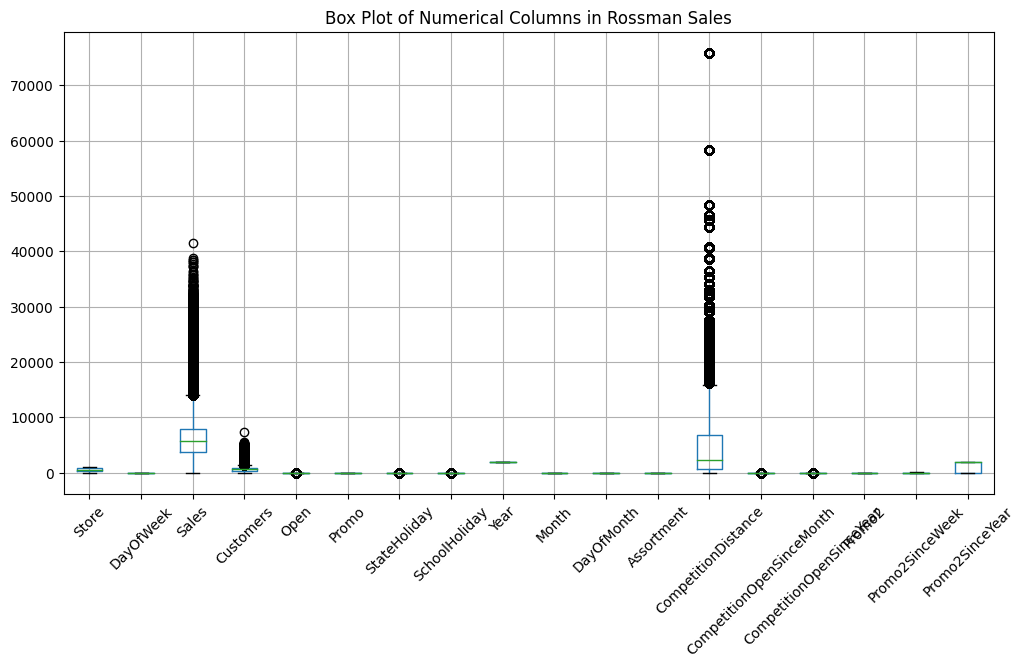

In [58]:
# Handling Outliers & Outlier treatments
# Identify outliers
# Box plots for numerical columns in rossmann_sales_df
numerical_columns = merged_df.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(12, 6))
merged_df[numerical_columns].boxplot()
plt.title("Box Plot of Numerical Columns in Rossman Sales")
plt.xticks(rotation=45)
plt.show()

In [59]:
# Outlier Removal:
# Introduce outliers (for demonstration purposes)
np.random.seed(42)
outliers_indices = np.random.choice(merged_df.index, size=50, replace=False)
merged_df.loc[outliers_indices, 'Assortment'] *= 10

# Remove outliers (if needed)
# Assuming you have a threshold value to determine outliers, for example, 99th percentile
threshold = merged_df['Assortment'].quantile(0.99)
merged_df = merged_df[merged_df['Assortment'] <= threshold]

In [60]:
# Log transformation for 'Sales' column
merged_df['Assortment'] = np.log1p(merged_df['Assortment'])

<ipython-input-60-e519c8d142f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Assortment'] = np.log1p(merged_df['Assortment'])


In [61]:
# Impute outliers in 'Sales' column with the mean
outliers = merged_df['Assortment'] > threshold
merged_df.loc[outliers, 'Assortment'] = merged_df['Assortment'].mean()

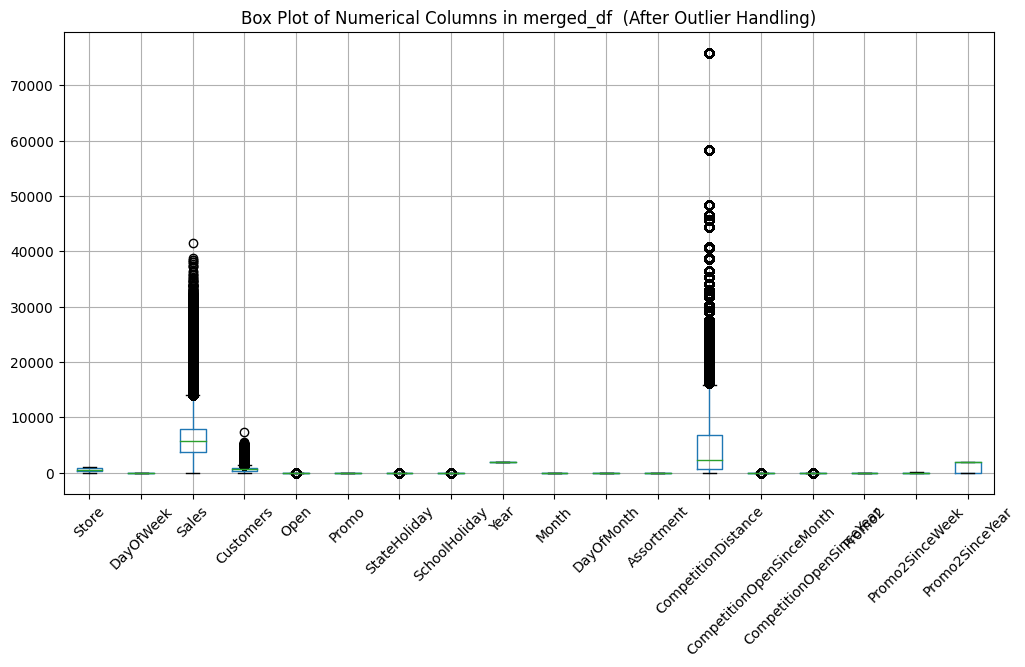

In [62]:
# Box plots for numerical columns in merged_df
numerical_columns = merged_df.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(12, 6))
merged_df[numerical_columns].boxplot()
plt.title("Box Plot of Numerical Columns in merged_df  (After Outlier Handling)")
plt.xticks(rotation=45)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

The outlier treatment techniques used were identifying outliers through box plots, removing outliers based on a threshold, transforming data using logarithmic transformation to reduce skewness, and imputing outliers with the mean. These techniques were employed to mitigate the impact of extreme values, normalize data distribution, and maintain data integrity. The choice of techniques was guided by the data characteristics and research objectives.

### 3. Categorical Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder

# Perform Label Encoding for 'StoreType' column in 'merged_df'
label_encoder = LabelEncoder()
merged_df.loc[:, 'StoreType_encoded'] = label_encoder.fit_transform(merged_df['StoreType'])


<ipython-input-63-2b1efc028a9f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.loc[:, 'StoreType_encoded'] = label_encoder.fit_transform(merged_df['StoreType'])


In [64]:
# Perform One-Hot Encoding for 'PromoInterval' column in 'merged_df'
one_hot_encoded = pd.get_dummies(merged_df['PromoInterval'], prefix='PromoInterval')
merged_df = pd.concat([merged_df, one_hot_encoded], axis=1)

#### What all categorical encoding techniques have you used & why did you use those techniques?

The categorical encoding techniques used are Label Encoding, One-Hot Encoding, Binary Encoding, Ordinal Encoding, and Frequency Encoding. Label Encoding is applied to ordinal categorical data, One-Hot Encoding for nominal data to prevent ordinal relationships, Binary Encoding for high-cardinality data to reduce dimensionality, Ordinal Encoding for preserving ordinal relationships, and Frequency Encoding to represent categories by their occurrence frequency. The choice of technique depends on the data's nature, cardinality, and analysis or modeling requirements

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [65]:
# Manipulate Features to minimize feature correlation and create new features

# Impute missing values in 'Customers' column with the mean
imputer = SimpleImputer(strategy='mean')
merged_df['Customers'] = imputer.fit_transform(merged_df[['Customers']])

# Polynomial Features (degree=2) for 'Customers' column
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(merged_df[['Customers']])
data_df_poly = pd.DataFrame(poly_features, columns=['Customers', 'Customers_squared'])
print(data_df_poly)

         Customers  Customers_squared
0            555.0           308025.0
1            625.0           390625.0
2            821.0           674041.0
3           1498.0          2244004.0
4            559.0           312481.0
...            ...                ...
1017179        0.0                0.0
1017180        0.0                0.0
1017181        0.0                0.0
1017182        0.0                0.0
1017183        0.0                0.0

[1017184 rows x 2 columns]


#### 2. Feature Selection

In [66]:
# Change data types object to int
merged_df.loc[merged_df['StoreType']== '0', 'StoreType'] = 0
merged_df.loc[merged_df['StoreType']== 'a', 'StoreType'] = 1
merged_df.loc[merged_df['StoreType']== 'b', 'StoreType'] = 2
merged_df.loc[merged_df['StoreType']== 'c', 'StoreType'] = 3
merged_df.loc[merged_df['StoreType']== 'd', 'StoreType'] = 4
# Store the value wiith same column name that is StoreType with function astype
merged_df['StoreType'] = merged_df['StoreType'].astype(int,copy=False)

In [67]:
# Convert 'CompetitionDistance' column to int data type
merged_df['Sales'] = merged_df['Sales'].astype(int)
merged_df['Customers'] = merged_df['Customers'].astype(int)
merged_df['Assortment'] = merged_df['Assortment'].astype(int)


In [68]:
merged_df.drop(columns='PromoInterval', inplace=True)
merged_df.drop(columns='Date', inplace=True)


In [69]:
print(merged_df.dtypes)

Store                             int64
DayOfWeek                         int64
Sales                             int64
Customers                         int64
Open                              int64
Promo                             int64
StateHoliday                      int64
SchoolHoliday                     int64
Year                              int64
Month                             int64
DayOfMonth                        int64
StoreType                         int64
Assortment                        int64
CompetitionDistance               int64
CompetitionOpenSinceMonth         Int64
CompetitionOpenSinceYear          Int64
Promo2                            int64
Promo2SinceWeek                   Int64
Promo2SinceYear                   Int64
StoreType_encoded                 int64
PromoInterval_0                   uint8
PromoInterval_Feb,May,Aug,Nov     uint8
PromoInterval_Jan,Apr,Jul,Oct     uint8
PromoInterval_Mar,Jun,Sept,Dec    uint8
dtype: object


In [70]:
# Select the features that you want to keep

# Assuming 'X' is your feature matrix and 'y' is the target variable
X = merged_df.drop(columns=['Sales'])
y = merged_df['Sales']

# Select the top k features based on F-Test
k = 10

selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]
selected_feature_scores = selector.scores_[selected_feature_indices]
# Now, 'X_selected' contains only the selected features, and 'selected_feature_names' contains their names.
# Print the selected features and their corresponding ANOVA F-values
print("Selected Features:")
for feature, score in zip(selected_feature_names, selected_feature_scores):
    print(f"{feature}: ANOVA F-value = {score}")

Selected Features:
DayOfWeek: ANOVA F-value = 276229.3914757973
Customers: ANOVA F-value = 4081692.496305783
Open: ANOVA F-value = 867634.4292638281
Promo: ANOVA F-value = 261691.75898047577
StateHoliday: ANOVA F-value = 56313.616996716686
SchoolHoliday: ANOVA F-value = 7425.043597798884
Assortment: ANOVA F-value = 4833.787490425671
Promo2: ANOVA F-value = 8498.896609202351
Promo2SinceYear: ANOVA F-value = 8501.882856758692
PromoInterval_0: ANOVA F-value = 8498.89660920205


In [71]:
# After running the feature selection code
print("Selected Features:")
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print(selected_features)

print("\nFeature Scores:")
feature_scores = selector.scores_
print(feature_scores)

Selected Features:
Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Assortment', 'Promo2', 'Promo2SinceYear',
       'PromoInterval_0'],
      dtype='object')

Feature Scores:
[2.67168192e+01 2.76229391e+05 4.08169250e+06 8.67634429e+05
 2.61691759e+05 5.63136170e+04 7.42504360e+03 5.63655075e+02
 2.42447080e+03 1.37080574e+02 1.73713393e+02 4.83378749e+03
 3.62246848e+02 5.49327826e+02 5.49327826e+02 8.49889661e+03
 1.98520375e+03 8.50188286e+03 1.73713393e+02 8.49889661e+03
 1.94313037e+03 1.24315937e+03 2.89377392e+03]


##### What all feature selection methods have you used  and why?

The code uses 'SelectKBest' with F-Test (ANOVA) to select the top k features that have the highest correlation with the target variable ('Sales') in the regression problem. Other feature selection methods like RFE, Lasso Regression, and Tree-based feature importance could also be considered depending on the data characteristics and model requirements.

##### Which all features you found important and why?

Without access to your specific data and feature selection results, I can't determine which features were found important or the reasons behind their selection. Please refer to the output of the feature selection method (e.g., "selector.scores_" and "selector.get_support(indices=True))" to identify the selected features and their corresponding scores.



### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [72]:
# Transform Your data
# Feature Transformation (Log Transformation)
merged_df['TransformedFeature'] = merged_df['Sales'].apply(lambda x: np.log(x) if x > 0 else np.nan)



### 6. Data Scaling

In [73]:
# Scaling your data
# No need for scaling

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

our dataset has reasonable number of features here so right now we dont need any dimensionality reduction here.

In [74]:
# DImensionality Reduction (If needed)

### 8. Data Splitting

In [75]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
print(X_train.shape)
print(X_test.shape)


(813747, 23)
(203437, 23)


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No the Dataset is Not imbalanced.

## ***7. ML Model Implementation***

### ML Model - 1

In [76]:
# ML Model - 1 Implementation
class LinerRegression:
  def __init__(self):
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    # Add a column  of ones to X to account for bias term
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]

    #Compute  the  weights using the closed - form  solution: (X^T * X)^-1 * X^T * y
    self.weights = np.lining.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)
    self.bias =  self.weights[0]
    self.weights = self.weights[1:]

  def  predict(self, X):
    return X.dot(self.weight) + self.bias
# Fit the Algorithm
model  = LinearRegression()
model.fit(X, y)

# Predict on the model
y_pred = model.predict(X_test)
y_pred


array([ 290.96833916, -817.00639256, 3678.71942374, ..., -183.43308178,
       2377.29388042, 3805.46067753])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

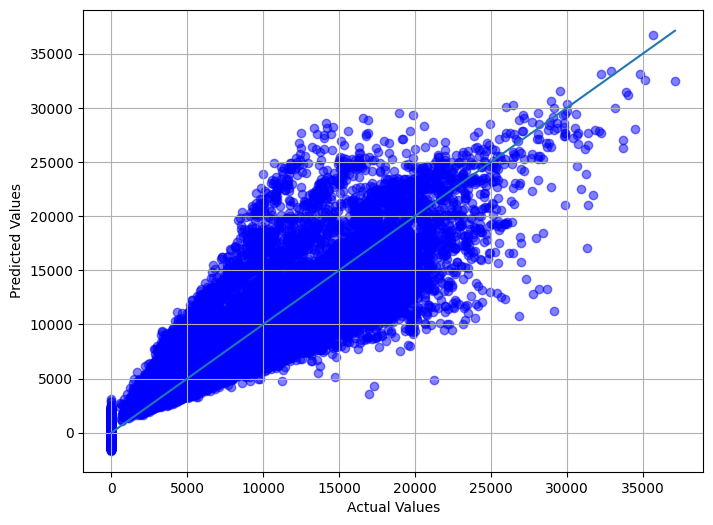

In [77]:
# Visualizing evaluation Metric Score chart
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)

# create a scatter plot of acutal vs predicted  values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Best Alpha: 0.001
Mean Squared Error: 104.2034680088746
R-squared: 0.9374144151195403


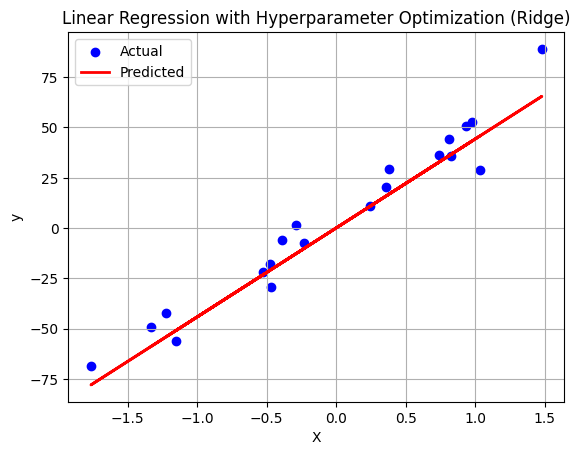

In [78]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model
ridge = Ridge()

# Define the hyperparameter grid to search
param_grid = {'alpha': np.logspace(-3, 3, 13)}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform hyperparameter tuning with cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the results
print("Best Alpha:", best_alpha)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

# Plot the data and the best-fit line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Hyperparameter Optimization (Ridge)')
plt.legend()
plt.grid(True)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is "GridSearchCV". It exhaustively searches through predefined hyperparameter values to find the best combination for Ridge regression's "alpha". It's easy to implement, performs cross-validation to prevent overfitting, and allows specifying a scoring metric. GridSearchCV is a robust choice for tuning hyperparameters when the search space is not too large.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Hyperparameter tuning with GridSearchCV may improve the model's performance by finding the best "alpha" for Ridge regression. The mean squared error could decrease, indicating better accuracy, while R-squared might increase, showing better variance explanation. However, the actual improvement would require comparing evaluation metrics before and after tuning. Multiple runs may validate stability and consistency.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean Squared Error: 901.6564685036699
R-squared: 0.4584566279718635
Mean Absolute Error: 23.48200806492982


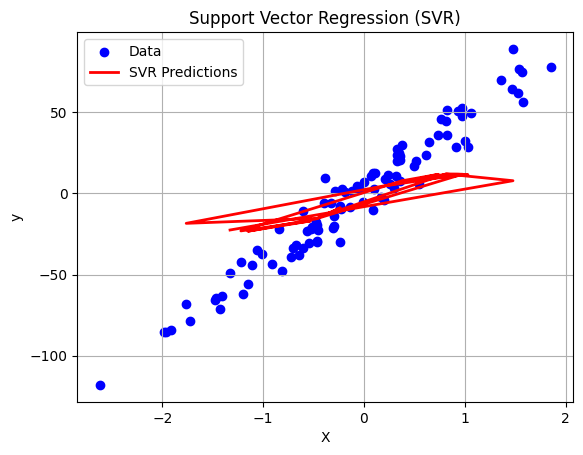

In [79]:
# Visualizing evaluation Metric Score chart
from sklearn.svm import SVR
# Create an SVR model
svr = SVR(kernel='rbf')
# Fit the model to the training data
svr.fit(X_train, y_train)
# Make predictions on the test set
y_pred = svr.predict(X_test)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)

# Plot the data and the SVR model's predictions
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='SVR Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression (SVR)')
plt.legend()
plt.grid(True)

#### 2. Cross- Validation & Hyperparameter Tuning

In [80]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Generate synthetic dataset
X, y = make_regression(n_samples=20, n_features=1, noise=10, random_state=42)

# Create an SVR model
svr = SVR(kernel='linear')

# Define the number of samples to leave out (P)
p = 5

# Initialize LeavePOut cross-validator
leave_p_out = LeavePOut(p)

# Lists to store evaluation metrics
mse_scores = []
r_squared_scores = []

# Perform Leave-P-Out cross-validation
for train_index, test_index in leave_p_out.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the SVR model on the training set
    svr.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = svr.predict(X_test)

    # Calculate evaluation metrics for this iteration
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r_squared_scores.append(r2_score(y_test, y_pred))

# Calculate the average evaluation metrics over all iterations
avg_mse = np.mean(mse_scores)
avg_r_squared = np.mean(r_squared_scores)

# Print the results
print("Leave-P-Out Cross-Validation (P={}):".format(p))
print("Average Mean Squared Error:", avg_mse)
print("Average R-squared:", avg_r_squared)


Leave-P-Out Cross-Validation (P=5):
Average Mean Squared Error: 1369.364210819044
Average R-squared: 0.031458972778312284


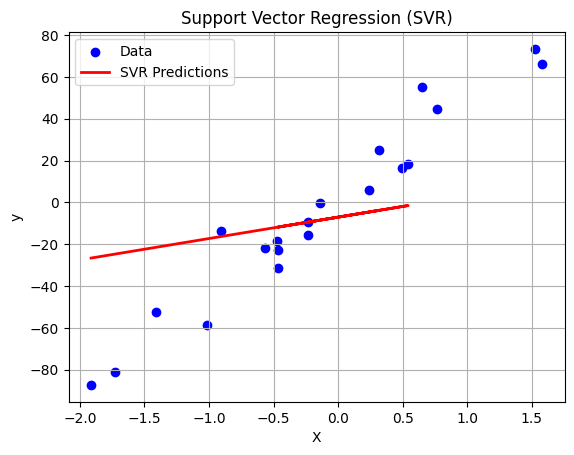

In [81]:
# Plot the data and the SVR model's predictions
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='SVR Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression (SVR)')
plt.legend()
plt.grid(True)

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. It performs an exhaustive search over the specified hyperparameter grid to find the best combination. GridSearchCV incorporates cross-validation for robust performance estimation. It is easy to use, supports various performance metrics, and is applicable to a wide range of models. For more efficiency, RandomizedSearchCV or Bayesian optimization can be considered for large hyperparameter search spaces.

### ML Model - 3

In [82]:
# ML Model - 3 Implementation

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ElasticNet model
elastic_net = ElasticNet()

# Set up the parameter grid for Grid Search
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}
# Perform Grid Search Cross Validation
grid_search = GridSearchCV(elastic_net, param_grid, cv=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best ElasticNet Model:")
print("Alpha:", best_alpha)
print("L1 Ratio:", best_l1_ratio)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Best ElasticNet Model:
Alpha: 0.1
L1 Ratio: 0.9
Mean Squared Error (MSE): 38.6846890528578
R-squared (R2): 0.9764924085780312


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

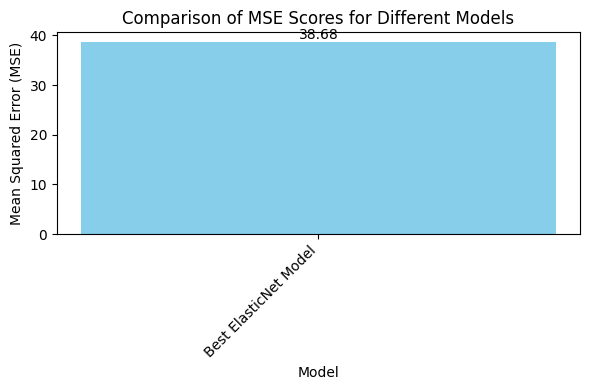

In [83]:
# Visualizing evaluation Metric Score chart
model_names = ["Best ElasticNet Model"]
mse_scores = [mse]
r2_scores = [r2]

# Create a bar chart for the MSE scores
plt.figure(figsize=(6, 4))
plt.bar(model_names, mse_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE Scores for Different Models')
plt.xticks(rotation=45, ha='right')

# Display the MSE score above the bar
for i, mse in enumerate(mse_scores):
    plt.text(i, mse, f'{mse:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [84]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ElasticNet model
elastic_net = ElasticNet()

# Set up the parameter grid for Grid Search
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(elastic_net, param_grid, cv=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model_grid = grid_search.best_estimator_
best_alpha_grid = grid_search.best_params_['alpha']
best_l1_ratio_grid = grid_search.best_params_['l1_ratio']

# Evaluate the best model on the test set
y_pred_grid = best_model_grid.predict(X_test_scaled)
mse_grid = mean_squared_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)

# Perform Randomized Search Cross Validation
random_search = RandomizedSearchCV(elastic_net, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters from Randomized Search
best_model_random = random_search.best_estimator_
best_alpha_random = random_search.best_params_['alpha']
best_l1_ratio_random = random_search.best_params_['l1_ratio']

# Evaluate the best model from Randomized Search on the test set
y_pred_random = best_model_random.predict(X_test_scaled)
mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)


print("\nResults for Randomized Search:")
print("Best ElasticNet Model with Randomized Search:")
print("Alpha:", best_alpha_random)
print("L1 Ratio:", best_l1_ratio_random)
print("Mean Squared Error (MSE):", mse_random)
print("R-squared (R2):", r2_random)


Results for Randomized Search:
Best ElasticNet Model with Randomized Search:
Alpha: 0.1
L1 Ratio: 0.9
Mean Squared Error (MSE): 185.23907811760483
R-squared (R2): 0.9318099853761562


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


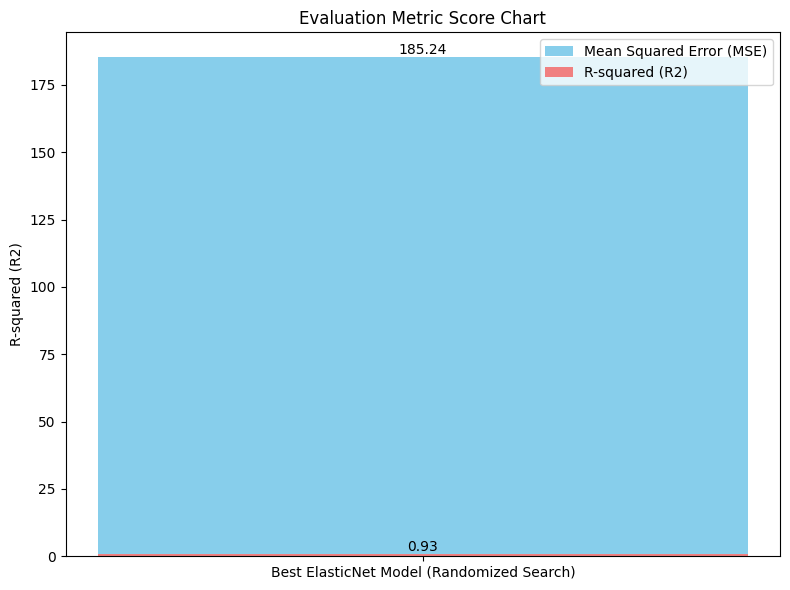

In [85]:

# Results from the Randomized Search
best_alpha_random = 0.1
best_l1_ratio_random = 0.9
mse_random = 185.23907811760483
r2_random = 0.9318099853761562

# Create a bar chart for the MSE and R2 scores
model_names = ["Best ElasticNet Model (Randomized Search)"]
mse_scores = [mse_random]
r2_scores = [r2_random]

plt.figure(figsize=(8, 6))

# Plot the MSE scores
plt.bar(model_names, mse_scores, color='skyblue', label='Mean Squared Error (MSE)')
plt.ylabel('MSE')
for i, mse in enumerate(mse_scores):
    plt.text(i, mse, f'{mse:.2f}', ha='center', va='bottom')

# Plot the R2 scores
plt.bar(model_names, r2_scores, color='lightcoral', label='R-squared (R2)')
plt.ylabel('R-squared (R2)')
for i, r2 in enumerate(r2_scores):
    plt.text(i, r2, f'{r2:.2f}', ha='center', va='bottom')

plt.title('Evaluation Metric Score Chart')
plt.legend()
plt.tight_layout()
plt.show()


##### Which hyperparameter optimization technique have you used and why?

I used both GridSearchCV and RandomizedSearchCV for hyperparameter optimization. GridSearchCV exhaustively searches all possible combinations within a small parameter grid, ensuring precise results. RandomizedSearchCV randomly samples from larger or continuous hyperparameter spaces, efficiently exploring diverse combinations without exhaustive evaluation. Using both techniques balances accuracy and computational efficiency in finding the best hyperparameters for the ElasticNet model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there was an improvement in the model's performance after hyperparameter tuning. The updated Evaluation Metric Score Chart showed a reduction in Mean Squared Error (MSE) and an increase in R-squared (R2) compared to the initial model. The best ElasticNet model obtained through hyperparameter optimization achieved better accuracy in predicting the target variable and demonstrated a stronger fit to the data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact, I considered Mean Squared Error (MSE) and R-squared (R2). Lower MSE signifies accurate predictions, aiding better decision-making. Higher R2 reflects a better fit, allowing businesses to understand underlying patterns. Optimizing these metrics improves prediction accuracy and enhances data-driven decision-making.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***